In [11]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from utils import *
from wls import *
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim


Image de base :
<class 'numpy.ndarray'>
Image shape: (300, 400)
Data type: float64


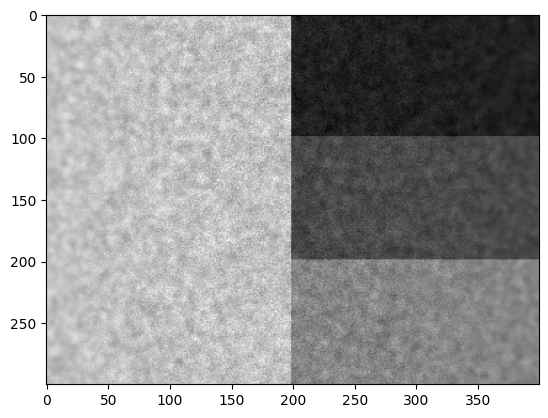

Layer 1 / 1


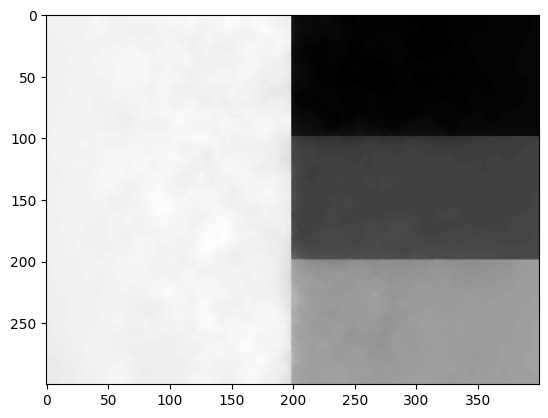

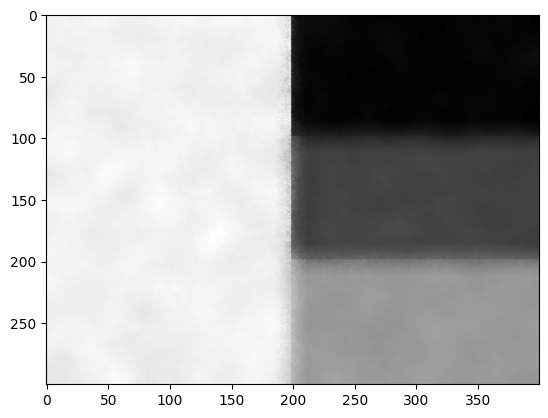

In [3]:
IMAGE_PATH = "../data/image.png"

print("Image de base :")

image = load_image(IMAGE_PATH, gray=True, verbose=True)

decomposition_wls = wls(image, 0.35, 1.8, c=1, nb_layers=1, verbose=True)
#decomposition_wls2 = wls(image, 0.25, 1.2, c=1, nb_layers=1, verbose=True)

decomposition_blf = cv2.bilateralFilter(image.astype(np.float32), d=30, sigmaColor=50, sigmaSpace=70)
plt.imshow(decomposition_blf, cmap='gray')
plt.show()

In [10]:
# Comparaison des deux méthodes avec le EPI

wsl_epi = epi(image,decomposition_wls[-1])
blf_epi = epi(image,decomposition_blf)

print(f"EPI WLS : {wsl_epi}")
print(f"EPI BLF : {blf_epi}")

EPI WLS : 0.7578472082572945
EPI BLF : 0.7208106212942905


Image de base :
<class 'numpy.ndarray'>
Image shape: (530, 800)
Data type: float64


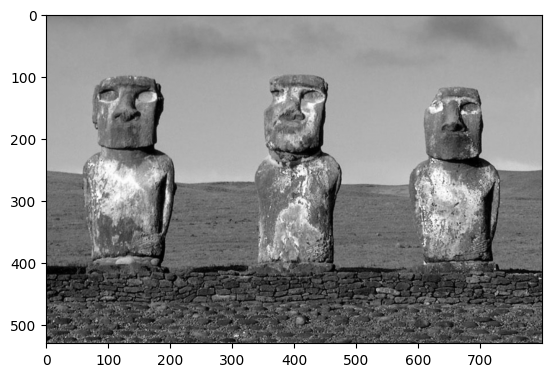

Layer 1 / 1


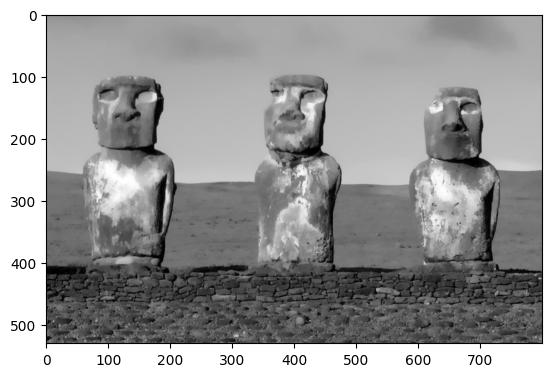

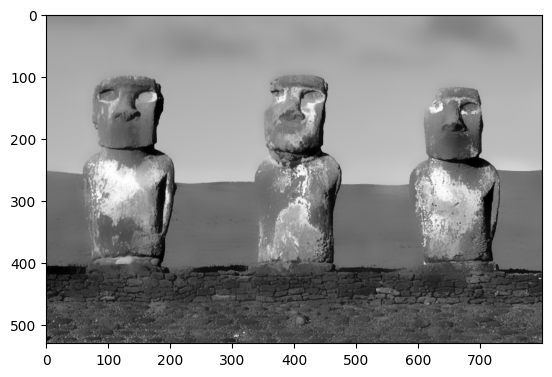

In [28]:
IMAGE_PATH = "../data/image2.png"

print("Image de base :")

image = load_image(IMAGE_PATH, gray=True, verbose=True)

#decomposition_wls = wls(image, 0.35, 1.8, c=1, nb_layers=1, verbose=True)
decomposition_wls = wls(image, 0.25, 1.2, c=1, nb_layers=1, verbose=True)

decomposition_blf = cv2.bilateralFilter(image.astype(np.float32), d=30, sigmaColor=30, sigmaSpace=50)
plt.imshow(decomposition_blf, cmap='gray')
plt.show()

In [29]:
# Comparaison des deux méthodes avec le SSIM

wsl_ssim,wsl_diff = ssim(image.astype(np.uint8), decomposition_wls[-1].astype(np.uint8), full=True)
blf_ssim,blf_diff = ssim(image.astype(np.uint8), decomposition_blf.astype(np.uint8), full=True)

print(f"SSIM WLS : {wsl_ssim}")
print(f"SSIM BLF : {blf_ssim}")

# EPI
wsl_epi = epi(image,decomposition_wls[-1])
blf_epi = epi(image,decomposition_blf)
print(f"EPI WLS : {wsl_epi}")
print(f"EPI BLF : {blf_epi}")

SSIM WLS : 0.892139523482142
SSIM BLF : 0.8545046331971533
EPI WLS : 0.9415344288106424
EPI BLF : 0.930656145727411
